In [98]:
from Probabilities import __Calculate_Frequency__ as cf
import InformationTheory
import Wordle_Simulation as ws
import Data_Processing as dp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

### Calculate the letter frequency distribution

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


{'e': 0.1028, 's': 0.1027, 'a': 0.0924, 'o': 0.0684, 'r': 0.0642, 'i': 0.0579, 'l': 0.052, 't': 0.0508, 'n': 0.0455, 'u': 0.0387, 'd': 0.0378, 'y': 0.0319, 'c': 0.0312, 'p': 0.0311, 'm': 0.0305, 'h': 0.0271, 'g': 0.0253, 'b': 0.0251, 'k': 0.0231, 'f': 0.0172, 'w': 0.016, 'v': 0.0107, 'z': 0.0067, 'j': 0.0045, 'x': 0.0044, 'q': 0.0017}


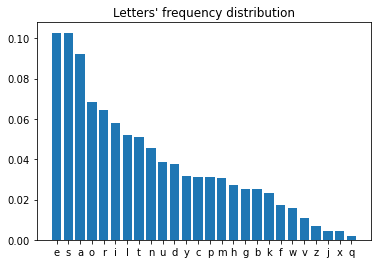

In [2]:
wordList = dp.valid_word_list
frequency = cf(wordList)
sortedFrequency = dict(sorted(frequency.items(), key=lambda item: item[1],reverse=True))
print(sortedFrequency)
plt.bar(sortedFrequency.keys(),sortedFrequency.values())
plt.title("Letters' frequency distribution",fontdict={"fontname":"Calibri"})
plt.savefig('figures/frequency_distribution.jpg',dpi = 'figure')

### calculate the entropy

In [3]:
def __Calculate_Entropy__(probability_dic):
    entropy = 0
    for value in probability_dic.values():
        information = math.log(1/value,2)
        entropy = entropy + (value * information)
    return entropy

### calculate the words match the pattern of five "grey"

In [28]:
def __Calculate_GreyProbability__(exampleWord,wordList):
    count = 0
    for word in wordList:
        for letter in exampleWord:
            if(letter in word):
                count = count + 1
                break
            else:
                continue
    print("grey count: ",count)
    
    print("gery probability: ",(len(wordList) - count) / len(wordList))
    

### calculate the probability distribution of all the possible result

In [45]:
def __Calculate_probabilityDistribution__(exampleWord,wordList):
    result = []
    result_dic = {}

    for word in wordList:
        feedback = ws.__feedback__(exampleWord,word)
        subResult = "".join(feedback)

        if(result.count(subResult) != 0):
            index1 = result.index(subResult)
            # key1 = "result" + index
            result_dic[str(index1)] = result_dic[str(index1)] + 1
        else:
            result.append(subResult)
            index2 = result.index(subResult)
            # key2 = "result" + index
            result_dic[str(index2)] = 1
        # print(result_dic)
    sortedResult_dic = dict(sorted(result_dic.items(), key=lambda item: item[1],reverse=True))
    for key in sortedResult_dic.keys():
        sortedResult_dic[key] = (sortedResult_dic[key] / len(wordList))
    return sortedResult_dic

### the example word "hello" , calculate the grey probability and probability distribution of all possible results

grey count:  10191
gery probability:  0.21323245580174477


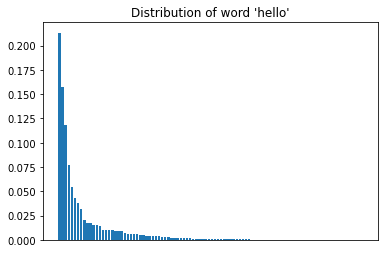

In [55]:
__Calculate_GreyProbability__("hello",dp.valid_word_list)
hellowResult_dic = __Calculate_probabilityDistribution__("hello",dp.valid_word_list)
plt.bar(hellowResult_dic.keys(),hellowResult_dic.values())
plt.title("Distribution of word 'hello'",fontdict={"fontname":"Calibri"})
disx = plt.gca()
disx.get_xaxis().set_visible(False)
plt.savefig('figures/distribution_hello.jpg',dpi = 'figure')

### the example word "hello" , calculate the grey probability and probability distribution of all possible results

grey count:  11442
gery probability:  0.11665251293136725


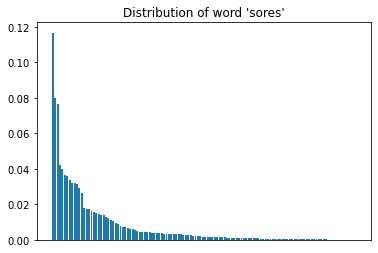

In [56]:
__Calculate_GreyProbability__("sores",dp.valid_word_list)
soresResult_dic = __Calculate_probabilityDistribution__("sores",dp.valid_word_list)
plt.bar(soresResult_dic.keys(),soresResult_dic.values())
plt.title("Distribution of word 'sores'",fontdict={"fontname":"Calibri"})
disx = plt.gca()
disx.get_xaxis().set_visible(False)
plt.savefig('figures/distribution_sores.jpg',dpi = 'figure')

### Compare entropy of the word "hello" and the word "sores" 

In [8]:
helloEntropy = __Calculate_Entropy__(hellowResult_dic)
print(helloEntropy)
soresEntropy = __Calculate_Entropy__(soresResult_dic)
print(soresEntropy)

4.193450424012715
5.373021763996928


In [9]:
def __PlayRoundDisplay__(roundList,method,title):
    round_count = [0] * (max(roundList) + 1)
    for times in roundList:
        if(round_count[times] != 0):
            round_count[times] = round_count[times] + 1
        else:
            round_count[times] = 1
    
    # display the result
    fig, ax = plt.subplots()

    barResult = ax.bar(range(max(roundList) + 1),round_count)
    # plt.plot(round_count)
    ax.set_title("Round distribution of " +  title,fontdict={"fontname":"Calibri"})
    ax.bar_label(barResult,padding = 1)
    if(max(roundList) >= 15):
        ax.set_xlim(left = 1, right = 19)
    else:
        ax.set_xlim(left = 1, right = 13)
    # disx = plt.gca()
    # disx.get_xaxis().set_visible(False)
    plt.savefig('figures/' + method + '_round_' + title + '.jpg',dpi = 'figure')
    


### performance of Letter Frequency

In [10]:
pb_wordleAnswerList = pd.read_csv("./data/result/probability-wordleAnswerlist.csv").iloc[:,1]
pb_validroundList = pd.read_csv("./data/result/probability-validWordList.csv").iloc[:,1]

mean of wordle answer list:  6.195
success percentage:  0.625


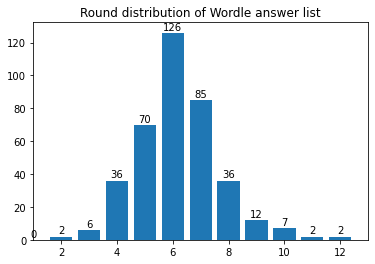

In [11]:
__PlayRoundDisplay__(pb_wordleAnswerList,'pb',"Wordle answer list")
print("mean of wordle answer list: ", round(pb_wordleAnswerList.mean(),3))
count = 0
for times in pb_wordleAnswerList:
    if(times <= 6):
        count = count + 1
print("success percentage: ",round(count / len(pb_wordleAnswerList),3))

mean of valid words list:  6.568
success percentage:  0.551


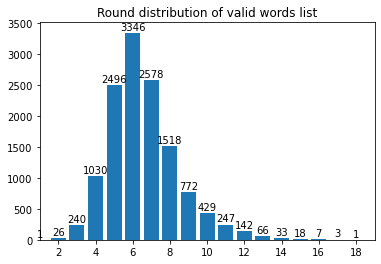

In [12]:
__PlayRoundDisplay__(pb_validroundList,'pb', "valid words list")
print("mean of valid words list: ", round(pb_validroundList.mean(),3))
count = 0
for times in pb_validroundList:
    if(times <= 6):
        count = count + 1
print("success percentage: ",round(count / len(pb_validroundList), 3))

### information theory performance

In [13]:
info_wordleAnswerList = pd.read_csv("./data/result/information-wordleAnswerlist.csv").iloc[:,1]
info_validroundList = pd.read_csv("./data/result/information-validWordList.csv").iloc[:,1]

mean of wordle answer list:  4.862
success percentage:  0.88


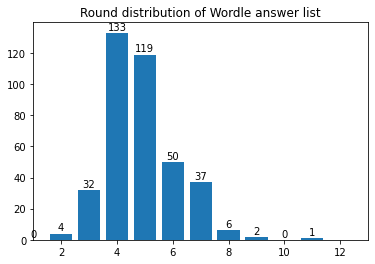

In [14]:
__PlayRoundDisplay__(info_wordleAnswerList,'info',"Wordle answer list")
print("mean of wordle answer list: ", round(info_wordleAnswerList.mean(),3))
count = 0
for times in info_wordleAnswerList:
    if(times <= 6):
        count = count + 1
print("success percentage: ",round(count / len(info_wordleAnswerList),3))

mean of valid words list:  5.173
success percentage:  0.831


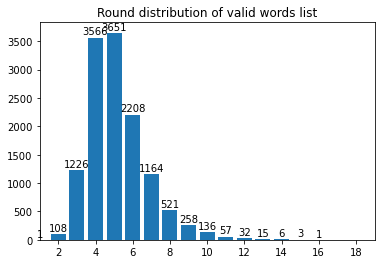

In [15]:
__PlayRoundDisplay__(info_validroundList,'info',"valid words list")
print("mean of valid words list: ", round(info_validroundList.mean(),3))
count = 0
for times in info_validroundList:
    if(times <= 6):
        count = count + 1
print("success percentage: ",round(count / len(info_validroundList), 3))

## Best case example details "alone"

grey count:  197
gery probability:  0.0
41


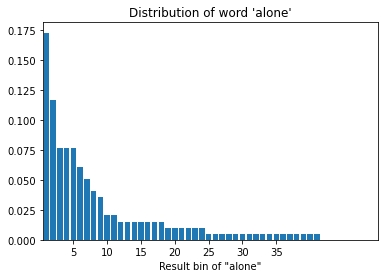

In [81]:
alone_potentialList = pd.read_csv("./data/result/alone-potentialList.csv").iloc[:,1].tolist()
__Calculate_GreyProbability__("alone",alone_potentialList)
aloneResult_dic = __Calculate_probabilityDistribution__("alone",alone_potentialList)
xNarry = np.arange(1,42,1)
print(len(aloneResult_dic.values()))
plt.bar(xNarry,aloneResult_dic.values())
plt.title("Distribution of word 'alone'",fontdict={"fontname":"Calibri"})
plt.xlabel('Result bin of "alone"')
xNarry = np.arange(0,40,5)
disx = plt.gca()
disx.set_xticks(xNarry)
disx.set_xlim(left = 0.5, right = 50)
# disx.get_xaxis().set_visible(False)
plt.savefig('figures/distribution_alone.jpg',dpi = 'figure')

In [85]:
aloneEntropyDic = []
for word in alone_potentialList:
    probabilityDic = __Calculate_probabilityDistribution__(word,alone_potentialList)
    entropy = __Calculate_Entropy__(probabilityDic)
    aloneEntropyDic.append(entropy)

maxEntropy = max(aloneEntropyDic)
print(maxEntropy)
print(sum(aloneEntropyDic) / len(aloneEntropyDic))
index = aloneEntropyDic.index(maxEntropy)
selected = alone_potentialList[index]
print(selected)


4.403776355896567
3.536905280347466
alone


In [86]:
testWordListEntropyDic = []
for word in dp.test_word_list:
    probabilityDic = __Calculate_probabilityDistribution__(word,dp.test_word_list)
    entropy = __Calculate_Entropy__(probabilityDic)
    testWordListEntropyDic.append(entropy)

maxEntropy = max(testWordListEntropyDic)
print(maxEntropy)
print(sum(testWordListEntropyDic) / len(testWordListEntropyDic))
index = testWordListEntropyDic.index(maxEntropy)
selected = dp.test_word_list[index]
print(selected)

5.727941819867802
4.455111005291167
crate


## Updated information theory model by changing open word

In [89]:
validWordEntropyList = []
for word in dp.valid_word_list:
    validProbabilityDic = __Calculate_probabilityDistribution__(word,dp.valid_word_list)
    entropy = __Calculate_Entropy__(validProbabilityDic)
    validWordEntropyList.append(entropy)

maxEntropy = max(validWordEntropyList)
print(maxEntropy)
print(sum(validWordEntropyList) / len(validWordEntropyList))
index = validWordEntropyList.index(maxEntropy)
selected = dp.valid_word_list[index]
print(selected)
df = pd.DataFrame(validWordEntropyList)
df.to_csv("./data/result/validEntropyList.csv")

6.195594730245378
4.55550919081762
tares


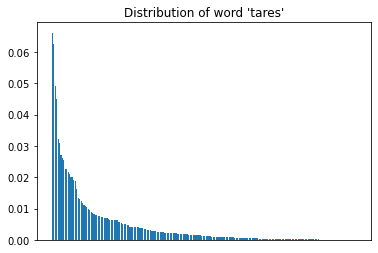

In [91]:
taresProbabilitydic = __Calculate_probabilityDistribution__("tares",dp.valid_word_list)
plt.bar(taresProbabilitydic.keys(),taresProbabilitydic.values())
plt.title("Distribution of word 'tares'",fontdict={"fontname":"Calibri"})
disx = plt.gca()
disx.get_xaxis().set_visible(False)
plt.savefig('figures/distribution_tares.jpg',dpi = 'figure')

mean of valid words list:  4.982
success percentage:  0.857


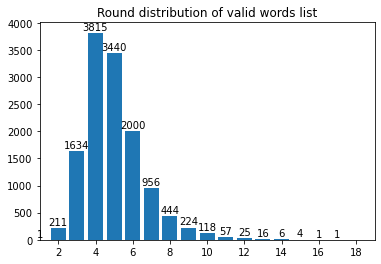

In [92]:
updatedInfo_validWordList = pd.read_csv("./data/result/OptimizedInformation-validWordList.csv").iloc[:,1]
__PlayRoundDisplay__(updatedInfo_validWordList,'Optimized info',"valid words list")
print("mean of valid words list: ", round(updatedInfo_validWordList.mean(),3))
count = 0
for times in updatedInfo_validWordList:
    if(times <= 6):
        count = count + 1
print("success percentage: ",round(count / len(updatedInfo_validWordList), 3))

mean of valid words list:  4.672
success percentage:  0.911


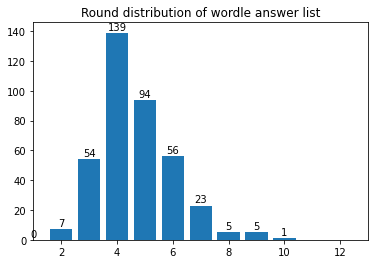

In [93]:
updatedInfo_WordleAnswerList = pd.read_csv("./data/result/OptimizedInformation-wordleAnswerlist.csv").iloc[:,1]
__PlayRoundDisplay__(updatedInfo_WordleAnswerList,'Optimized info',"wordle answer list")
print("mean of valid words list: ", round(updatedInfo_WordleAnswerList.mean(),3))
count = 0
for times in updatedInfo_WordleAnswerList:
    if(times <= 6):
        count = count + 1
print("success percentage: ",round(count / len(updatedInfo_WordleAnswerList), 3))

mean of valid words list:  4.188
success percentage:  0.969


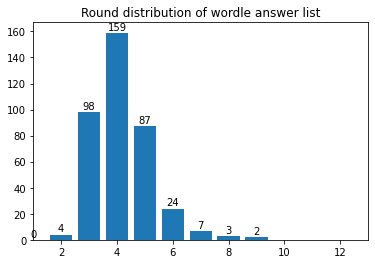

In [96]:
resultBin_WordleAnswerList = pd.read_csv("./data/result/ResultBinInformation-wordleAnswerlist.csv").iloc[:,1]
__PlayRoundDisplay__(resultBin_WordleAnswerList,'Optimized result bin info',"wordle answer list")
print("mean of valid words list: ", round(resultBin_WordleAnswerList.mean(),3))
count = 0
for times in resultBin_WordleAnswerList:
    if(times <= 6):
        count = count + 1
print("success percentage: ",round(count / len(resultBin_WordleAnswerList), 3))

## Colour recognization model

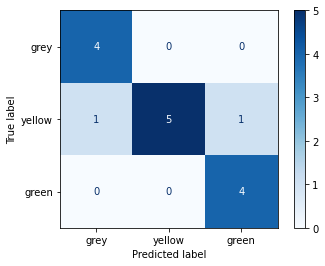

In [100]:
# df = pd.DataFrame(wordleAnswerRoundList)
# df.to_csv("./data/result/ResultBinInformation-wordleAnswerlist.csv")

y_pred = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
y_test = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2])
labels = ["grey", "yellow", "green"]

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()